# Loan Approval using different Classifiers

##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading datasets
loan_dataset = pd.read_csv('loan_table.csv')
borrower_dataset = pd.read_csv('borrower_table.csv')

In [ ]:
#viewing dataset
loan_dataset

,loan_id,loan_purpose,date,loan_granted,loan_repaid
0,19454,investment,2012-03-15,0,NaN
1,496811,investment,2012-01-17,0,NaN
2,929493,other,2012-02-09,0,NaN
3,580653,other,2012-06-27,1,1.0
4,172419,business,2012-05-21,1,0.0
...,...,...,...,...,...
101095,734902,emergency_funds,2012-01-30,1,0.0
101096,712467,business,2012-11-22,1,0.0
101097,209268,other,2012-09-13,1,1.0
101098,779254,business,2012-02-08,1,1.0


In [ ]:
#viewing dataset
borrower_dataset

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101095,38238,1,NaN,NaN,2200,0.83,1295,2240,0,0,47,2
101096,590712,1,NaN,NaN,3800,0.70,340,3802,1,36100,41,7
101097,961276,1,NaN,NaN,1600,1.06,445,1757,1,40800,71,3
101098,551027,0,1.0,0.0,7000,0.82,354,1435,1,41900,44,2


In [ ]:
#joining two datasets
dataset = pd.merge(borrower_dataset, loan_dataset, on='loan_id')

In [ ]:
#viewing dataset
dataset

,loan_id,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
0,289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
1,482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
2,135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
3,207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
4,828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101095,38238,1,NaN,NaN,2200,0.83,1295,2240,0,0,47,2,other,2012-12-24,0,NaN
101096,590712,1,NaN,NaN,3800,0.70,340,3802,1,36100,41,7,business,2012-05-17,1,1.0
101097,961276,1,NaN,NaN,1600,1.06,445,1757,1,40800,71,3,other,2012-09-07,0,NaN
101098,551027,0,1.0,0.0,7000,0.82,354,1435,1,41900,44,2,investment,2012-08-23,1,0.0



## Exploratory Data Analysis

In [ ]:
dataset.columns

Index(['loan_id', 'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'loan_purpose', 'date', 'loan_granted',
       'loan_repaid'],
      dtype='object')

In [ ]:
dataset.shape

(101100, 16)

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_id,101100.0,499666.826726,288662.006929,30.0,250333.75,499885.00,749706.25,999987.00
is_first_loan,101100.0,0.543492,0.498107,0.0,0.00,1.00,1.00,1.00
fully_repaid_previous_loans,46153.0,0.899291,0.300946,0.0,1.00,1.00,1.00,1.00
currently_repaying_other_loans,46153.0,0.364332,0.481247,0.0,0.00,0.00,1.00,1.00
total_credit_card_limit,101100.0,4112.743818,2129.121462,0.0,2700.00,4100.00,5500.00,13500.00
avg_percentage_credit_card_limit_used_last_year,94128.0,0.724140,0.186483,0.0,0.60,0.73,0.86,1.09
saving_amount,101100.0,1799.617616,1400.545141,0.0,834.00,1339.00,2409.00,10641.00
checking_amount,101100.0,3177.150821,2044.448155,0.0,1706.00,2673.00,4241.00,13906.00
is_employed,101100.0,0.658675,0.474157,0.0,0.00,1.00,1.00,1.00
yearly_salary,101100.0,21020.727992,18937.581415,0.0,0.00,21500.00,35300.00,97200.00


<AxesSubplot:xlabel='loan_granted', ylabel='count'>

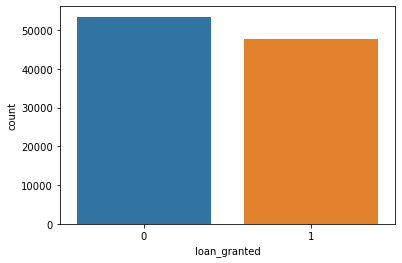

In [ ]:
sns.countplot(x="loan_granted", data = dataset)

In [ ]:
dataset['loan_granted'].value_counts()

0    53446
1    47654
Name: loan_granted, dtype: int64

In [ ]:
dataset['loan_granted'].value_counts(normalize=True)

0    0.528645
1    0.471355
Name: loan_granted, dtype: float64

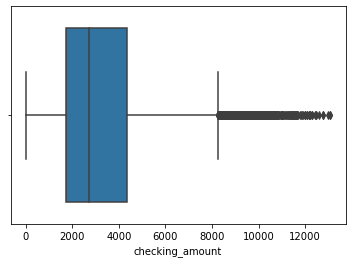

In [ ]:
sns.boxplot(x="checking_amount", data=dataset)
plt.show()

<AxesSubplot:>

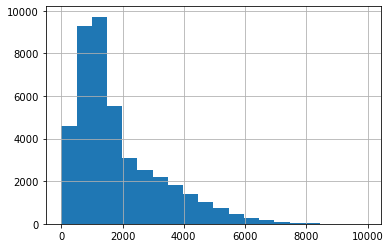

In [ ]:
dataset['saving_amount'].hist(bins=20)

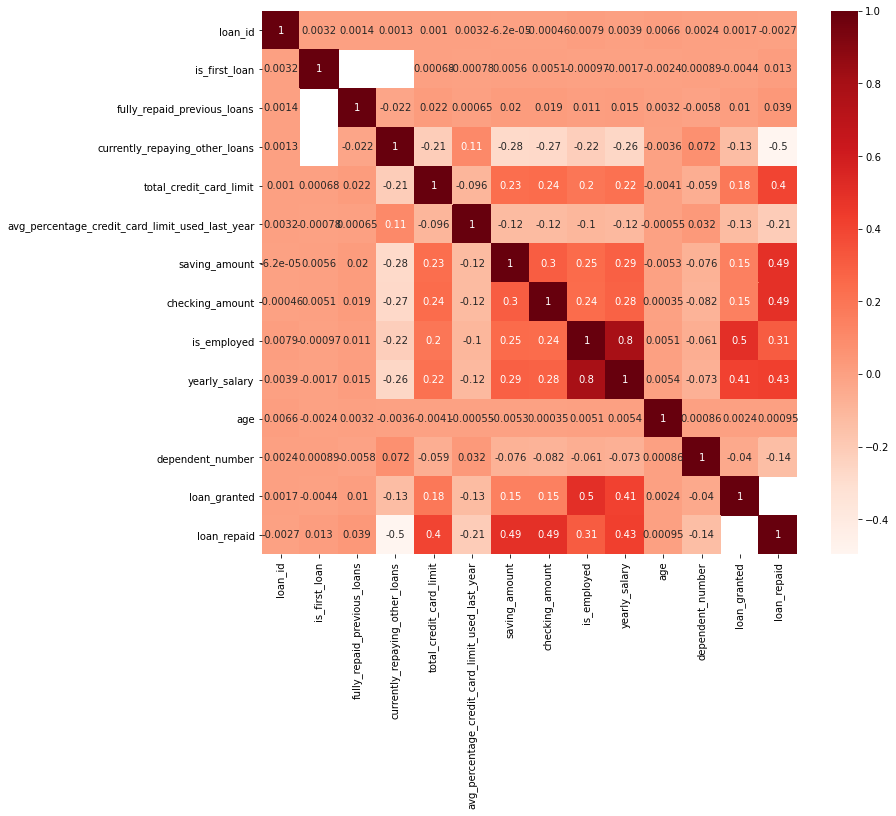

In [ ]:
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 0 to 101099
Data columns (total 16 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   loan_id                                          101100 non-null  int64  
 1   is_first_loan                                    101100 non-null  int64  
 2   fully_repaid_previous_loans                      46153 non-null   float64
 3   currently_repaying_other_loans                   46153 non-null   float64
 4   total_credit_card_limit                          101100 non-null  int64  
 5   avg_percentage_credit_card_limit_used_last_year  94128 non-null   float64
 6   saving_amount                                    101100 non-null  int64  
 7   checking_amount                                  101100 non-null  int64  
 8   is_employed                                      101100 non-null  int64  
 9   yearly_salary  

In [ ]:
dataset = dataset.drop(columns=['dependent_number', 'date', 'loan_repaid', 'loan_id'])

In [ ]:
dataset.isnull().any()

is_first_loan                                      False
fully_repaid_previous_loans                         True
currently_repaying_other_loans                      True
total_credit_card_limit                            False
avg_percentage_credit_card_limit_used_last_year     True
saving_amount                                      False
checking_amount                                    False
is_employed                                        False
yearly_salary                                      False
age                                                False
loan_purpose                                       False
loan_granted                                       False
dtype: bool

In [ ]:
dataset.dropna(subset = ['fully_repaid_previous_loans', 'currently_repaying_other_loans', 'avg_percentage_credit_card_limit_used_last_year'], inplace=True)

In [ ]:
dataset

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,loan_purpose,loan_granted
1,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,investment,0
3,0,1.0,0.0,1200,0.82,358,3388,0,0,24,investment,0
4,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,emergency_funds,0
8,0,1.0,0.0,7000,0.52,2575,2917,1,58900,33,emergency_funds,1
9,0,1.0,0.0,4300,0.83,722,892,1,5400,32,business,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101087,0,1.0,1.0,2200,0.87,1914,1595,1,24100,35,emergency_funds,0
101088,0,0.0,0.0,5900,0.71,2696,2844,1,44500,25,business,1
101090,0,1.0,0.0,3000,0.67,635,3335,1,7800,41,business,1
101092,0,1.0,1.0,4200,0.77,3863,3929,1,42100,75,emergency_funds,0


In [ ]:
dataset.shape

(43007, 12)

In [ ]:
dataset['loan_granted'].value_counts()

0    21569
1    21438
Name: loan_granted, dtype: int64

In [ ]:
dataset.duplicated().any()

False

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
dataset[['loan_purpose']] = ord_enc.fit_transform(dataset[['loan_purpose']])

In [ ]:
dataset

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,loan_purpose,loan_granted
1,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,3.0,0
3,0,1.0,0.0,1200,0.82,358,3388,0,0,24,3.0,0
4,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1.0,0
8,0,1.0,0.0,7000,0.52,2575,2917,1,58900,33,1.0,1
9,0,1.0,0.0,4300,0.83,722,892,1,5400,32,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
101087,0,1.0,1.0,2200,0.87,1914,1595,1,24100,35,1.0,0
101088,0,0.0,0.0,5900,0.71,2696,2844,1,44500,25,0.0,1
101090,0,1.0,0.0,3000,0.67,635,3335,1,7800,41,0.0,1
101092,0,1.0,1.0,4200,0.77,3863,3929,1,42100,75,1.0,0


In [ ]:
from sklearn import preprocessing
x = dataset.drop(columns=['loan_granted'], axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)

## Assigning target variables and values/Splitting test and train data

In [ ]:
from sklearn import preprocessing
#create a dataframe with all training data except the target column
X = x_scaled

In [ ]:
#separate target values
y = dataset['loan_granted'].values

In [ ]:
from sklearn.model_selection import train_test_split
#split dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

## Confusion matrix and Classification Metrics Function

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
def cnf_matrix(y_test, y_pred):
    cnf_mtx = confusion_matrix(y_test, y_pred)
    return cnf_mtx

In [ ]:
def cnf_mtx_values(cnf_matrix):
    TN = cnf_matrix[0][0]
    FN = cnf_matrix[1][0]
    TP = cnf_matrix[1][1]
    FP = cnf_matrix[0][1]
    TPR=TP/(TP+FN)
    TNR = TN/(TN+FP)
    Precision = TP/(TP+FP)
    Recall = TP/(TP+FN)
    return TPR, TNR, Precision, Recall

## Naive Bayesian Classifier

In [ ]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB
#Create a Gaussian Classifier
nb = GaussianNB()
# Fit the classifier to the data
nb.fit(X_train,y_train)
y_pred_nb  = nb.predict(X_test)

In [ ]:
acc_score_nb = accuracy_score(y_test, y_pred_nb)
acc_score_nb

0.74517554057196

In [ ]:
cnf_matrix_nb = cnf_matrix(y_test, y_pred_nb)
cnf_matrix_nb

array([[2626, 1688],
       [ 504, 3784]], dtype=int64)

In [ ]:
cnf_matrix_nb_values = cnf_mtx_values(cnf_matrix_nb)
cnf_matrix_nb_values

(0.8824626865671642,
 0.6087158089939732,
 0.6915204678362573,
 0.8824626865671642)

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
roc = roc_curve(y_test, y_pred_nb)
auc_score_nb = roc_auc_score(y_test, y_pred_nb)
auc_score_nb

0.7455892477805686

## Logistic Regression Classifier

In [ ]:
from sklearn import linear_model
lr = linear_model.LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

In [ ]:
acc_score_lr = accuracy_score(y_test, y_pred_lr)
acc_score_lr

0.7478493373634039

In [ ]:
cnf_matrix_lr = cnf_matrix(y_test, y_pred_lr)
cnf_matrix_lr

array([[2485, 1829],
       [ 340, 3948]], dtype=int64)

In [ ]:
cnf_matrix_lr_values = cnf_mtx_values(cnf_matrix_lr)
cnf_matrix_lr_values

(0.9207089552238806, 0.576031525266574, 0.683399688419595, 0.9207089552238806)

In [ ]:
roc = roc_curve(y_test, y_pred_lr)
auc_score_lr = roc_auc_score(y_test, y_pred_lr)
auc_score_lr

0.7483702402452274

## K-Nearest Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

In [ ]:
acc_score_knn = accuracy_score(y_test, y_pred_knn)
acc_score_knn

0.6868170192978377

In [ ]:
cnf_matrix_knn = cnf_matrix(y_test, y_pred_knn)
cnf_matrix_knn

array([[2830, 1484],
       [1210, 3078]], dtype=int64)

In [ ]:
cnf_matrix_knn_values = cnf_mtx_values(cnf_matrix_knn)
cnf_matrix_knn_values

(0.7178171641791045, 0.656003708854891, 0.6747040771591407, 0.7178171641791045)

In [ ]:
roc = roc_curve(y_test, y_pred_knn)
auc_score_knn = roc_auc_score(y_test, y_pred_knn)
auc_score_knn

0.7546078500058817

## Improving model performance by hyperparameter tuning

In [ ]:
# calculating the accuracy of models with  values of k from 1 to 99
mean_acc = np.zeros(100)
for i in range(1,99):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.64926761, 0.61985585, 0.68681702, 0.66147408, 0.71215996,
       0.69251337, 0.72471518, 0.70855615, 0.73378284, 0.72239014,
       0.73959544, 0.73029528, 0.74203674, 0.73529412, 0.74540804,
       0.74226924, 0.74726808, 0.743083  , 0.74645431, 0.74354801,
       0.74738433, 0.74645431, 0.74761683, 0.74657056, 0.7486631 ,
       0.74808184, 0.75122065, 0.74924436, 0.75098814, 0.75052313,
       0.75180191, 0.75122065, 0.75226691, 0.75273192, 0.75168565,
       0.75249942, 0.75215066, 0.75319693, 0.75296443, 0.75284817,
       0.75366194, 0.75389444, 0.75308068, 0.7540107 , 0.75308068,
       0.75412695, 0.75354569, 0.75354569, 0.75331318, 0.75366194,
       0.75319693, 0.75354569, 0.75319693, 0.75366194, 0.75296443,
       0.75366194, 0.75261567, 0.75284817, 0.75215066, 0.75284817,
       0.75203441, 0.75249942, 0.75168565, 0.75238317, 0.75168565,
       0.75226691, 0.75215066, 0.75226691, 0.75203441, 0.75215066,
       0.75191816, 0.75203441, 0.7515694 , 0.75191816, 0.75168

In [ ]:
#the best fitting model so far is when k = 50
knn = KNeighborsClassifier(n_neighbors = 46)
# Fit the classifier to the data
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

acc_score_knn = accuracy_score(y_test, y_pred_knn)
acc_score_knn

0.7541269472215764

## Decision Tree Classifier

In [ ]:
#Import Decision tree model
from sklearn.tree import DecisionTreeClassifier

#Create a Gaussian Classifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train the model using the training sets
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
acc_score_dt = accuracy_score(y_test, y_pred_dt)
acc_score_dt

0.7762148337595908

In [ ]:
cnf_matrix_dt = cnf_matrix(y_test, y_pred_dt)
cnf_matrix_dt

array([[2775, 1539],
       [ 386, 3902]], dtype=int64)

In [ ]:
cnf_matrix_dt_values = cnf_mtx_values(cnf_matrix_dt)
cnf_matrix_dt_values

(0.909981343283582, 0.6432545201668984, 0.7171475831648594, 0.909981343283582)

In [ ]:
roc = roc_curve(y_test, y_pred_dt)
auc_score_dt = roc_auc_score(y_test, y_pred_dt)
auc_score_dt

0.7766179317252403